# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
RunMultiAgent = True
if RunMultiAgent:
    print('Starting Multi-Agent-Unity-Environment')
    env_file_name = "Reacher_Windows_x86_64_Multi/Reacher.exe"
    env = UnityEnvironment(file_name=env_file_name,no_graphics=True)
else:
    print('Starting Single-Agent-Unity-Environment')
    env_file_name = "Reacher_Windows_x86_64_Single/Reacher.exe"
    env = UnityEnvironment(file_name=env_file_name,no_graphics=True)


Starting Multi-Agent-Unity-Environment


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

print('Brainstorming : ',brain_name)

Brainstorming :  ReacherBrain


### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
runrandom = False
if runrandom:
    for i_episode in range(20):
        env_info = env.reset(train_mode=True)[brain_name]     # reset the environment    
        states = env_info.vector_observations                  # get the current state (for each agent)
        scores = np.zeros(num_agents)                          # initialize the score (for each agent)
        i = 0
        while True and i<1000:
            i += 1
            if i % 200 == 0:
                print(i)
            # ToDo: randn draws from standard normal distribution, do I want this or better uniform scaled to -1,1
            actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
            actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
            # print(actions)
            # print(type(actions))
            # print(actions.shape)
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            scores += env_info.rewards                         # update the score (for each agent)
            states = next_states                               # roll over states to next time step
            if np.any(dones):                                  # exit loop if episode finished
                break
        print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

In [6]:
from ddpg_agent import ddpg_Agent
import cProfile

config = {
    'gamma'               : 0.99,
    'tau'                 : 1e-3,
    'action_size'         : action_size,
    'state_size'          : state_size,
    'hidden_size'         : 256,
    'buffer_size'         : 200000,
    'batch_size'          : 256,
    'dropout'             : 0.2,
    'seed'                : 1,
    'max_episodes'        : 256,
    'critic_learning_rate': 1e-4,
    'actor_learning_rate' : 1e-4,
    'num_agents'          : num_agents,
    'env_file_name'       : env_file_name,
    'brain_name'          : brain_name}

def print_config(config):
    print('Config Parameters    : ')
    for c,k in config.items():
        print('{:20s} : {}'.format(c,k))
        
print_config(config)
agent = ddpg_Agent(env, config)
# cProfile.run("all_rewards = agent.train()",'PerfStats')
all_rewards = agent.train()

if False:        
    config_alt = dict(config)
    config_alt['critic_learning_rate'] = 3e-4
    print_config(config_alt)
    agent = ddpg_Agent(env, config_alt)
    all_rewards = agent.train()

Config Parameters    : 
gamma                : 0.99
tau                  : 0.001
action_size          : 4
state_size           : 33
hidden_size          : 256
buffer_size          : 200000
batch_size           : 256
dropout              : 0.2
seed                 : 1
max_episodes         : 256
critic_learning_rate : 0.0001
actor_learning_rate  : 0.0001
num_agents           : 20
env_file_name        : Reacher_Windows_x86_64_Multi/Reacher.exe
brain_name           : ReacherBrain
Running on device :  cpu
Episode 0 || Total Reward :  0.608 || average reward :  0.608

Saved Networks in  trained_reacher_e0.pth
Episode 1 || Total Reward :  0.607 || average reward :  0.608 || Used 45.870 seconds, mem : 40040
Episode 2 || Total Reward :  0.921 || average reward :  0.712 || Used 44.511 seconds, mem : 60060
Episode 3 || Total Reward :  0.762 || average reward :  0.725 || Used 43.665 seconds, mem : 80080
Episode 4 || Total Reward :  0.968 || average reward :  0.773 || Used 43.457 seconds, mem : 100

Episode 78 || Total Reward : 21.340 || average reward :  8.876 || Used 49.977 seconds, mem : 200000
Episode 79 || Total Reward : 24.120 || average reward :  9.066 || Used 50.078 seconds, mem : 200000
Episode 80 || Total Reward : 25.861 || average reward :  9.274 || Used 49.969 seconds, mem : 200000
Episode 81 || Total Reward : 25.987 || average reward :  9.478 || Used 49.651 seconds, mem : 200000
Episode 82 || Total Reward : 27.467 || average reward :  9.694 || Used 49.736 seconds, mem : 200000
Episode 83 || Total Reward : 26.747 || average reward :  9.897 || Used 49.954 seconds, mem : 200000
Episode 84 || Total Reward : 28.757 || average reward : 10.119 || Used 50.125 seconds, mem : 200000
Episode 85 || Total Reward : 29.917 || average reward : 10.349 || Used 49.902 seconds, mem : 200000
Episode 86 || Total Reward : 29.441 || average reward : 10.569 || Used 49.834 seconds, mem : 200000
Episode 87 || Total Reward : 26.954 || average reward : 10.755 || Used 50.340 seconds, mem : 200000


Episode 159 || Total Reward : 31.461 || average reward : 30.843 || Used 54.229 seconds, mem : 400000
Episode 160 || Total Reward : 30.365 || average reward : 30.987 || Used 54.498 seconds, mem : 400000
Episode 161 || Total Reward : 34.253 || average reward : 31.169 || Used 54.177 seconds, mem : 400000
Episode 162 || Total Reward : 33.452 || average reward : 31.342 || Used 54.798 seconds, mem : 400000
Episode 163 || Total Reward : 34.439 || average reward : 31.545 || Used 54.226 seconds, mem : 400000
Episode 164 || Total Reward : 27.420 || average reward : 31.656 || Used 54.254 seconds, mem : 400000
Episode 165 || Total Reward : 34.846 || average reward : 31.842 || Used 54.144 seconds, mem : 400000
Episode 166 || Total Reward : 32.961 || average reward : 31.992 || Used 54.562 seconds, mem : 400000
Episode 167 || Total Reward : 36.603 || average reward : 32.172 || Used 54.391 seconds, mem : 400000
Episode 168 || Total Reward : 36.190 || average reward : 32.323 || Used 54.634 seconds, mem

Episode 241 || Total Reward : 37.850 || average reward : 33.265 || Used 54.858 seconds, mem : 400000
Episode 242 || Total Reward : 37.155 || average reward : 33.324 || Used 54.343 seconds, mem : 400000
Episode 243 || Total Reward : 33.509 || average reward : 33.387 || Used 54.482 seconds, mem : 400000
Episode 244 || Total Reward : 33.413 || average reward : 33.445 || Used 54.651 seconds, mem : 400000
Episode 245 || Total Reward : 35.789 || average reward : 33.506 || Used 54.846 seconds, mem : 400000
Episode 246 || Total Reward : 37.139 || average reward : 33.566 || Used 54.820 seconds, mem : 400000
Episode 247 || Total Reward : 38.314 || average reward : 33.643 || Used 54.631 seconds, mem : 400000
Episode 248 || Total Reward : 38.364 || average reward : 33.751 || Used 54.933 seconds, mem : 400000
Episode 249 || Total Reward : 38.733 || average reward : 33.836 || Used 54.630 seconds, mem : 400000
Episode 250 || Total Reward : 37.585 || average reward : 33.904

Saved Networks in  trained

When finished, you can close the environment.

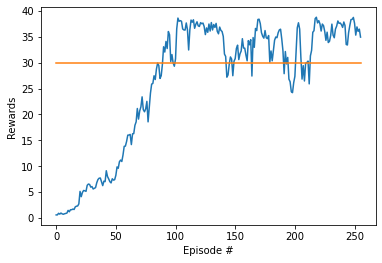

In [8]:
import matplotlib.pyplot as plt
import torch
plt.ion()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(all_rewards)), all_rewards)
plt.plot(np.arange(len(all_rewards)), 30*np.ones(len(all_rewards)))
plt.ylabel('Rewards')
plt.xlabel('Episode #')
plt.show()


env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```